In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import cluster, mixture
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score, silhouette_score

In [3]:
data = pd.read_csv("./data_transformed.csv", index_col=0)

In [4]:
data

,n_words,n_unique_words,long_word_freq,mean_word_length,single_use_word_freq,eth_freq,PROPN_freq,NOUN_freq,ADJ_freq,VERB_freq,...,anticipation_freq,disgust_freq,fear_freq,joy_freq,negative_freq,positive_freq,sadness_freq,surprise_freq,trust_freq,named_entities_freq
Book,,,,,,,,,,,,,,,,,,,,,
Buddhism,1.805769,0.256573,0.639198,0.637853,-2.778243,-0.375587,-0.094018,-0.961272,0.648272,0.613734,...,-0.596172,1.504661,0.407991,0.319668,-0.001656,-0.586864,0.929658,-0.515602,0.027511,-0.315839
Buddhism,0.036538,-0.383772,0.963936,0.619943,-2.742443,-0.375587,-1.004111,1.151430,0.361970,-0.296266,...,-1.034234,-0.046232,-1.095521,-0.305302,1.849496,0.213243,-1.076177,-0.450737,1.207296,-0.670465
Buddhism,0.804141,0.160521,-0.236586,0.123760,-1.878744,-0.375587,-1.361454,1.397753,-0.240857,0.252338,...,-0.360891,-0.341185,0.161841,-1.162987,3.590734,-0.921661,0.601269,-0.176494,-0.778542,-0.508630
Buddhism,0.251841,-0.335746,-0.076691,0.733189,-2.660575,-0.375587,-0.475757,1.330137,-1.179656,-0.173409,...,-0.554543,-0.959375,-0.733375,-0.994072,0.662142,0.572586,-0.721875,-0.628964,1.864328,-0.327573
Buddhism,-0.815314,-1.008109,10.368032,3.805384,-2.018067,-0.375587,-0.254947,3.955570,-2.066562,-2.978327,...,-1.292159,-0.959375,1.774820,0.592091,1.053190,-0.998082,1.029950,-0.791279,1.049490,0.749361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Bible,1.253469,1.649324,-0.586189,-0.780794,-0.420176,2.825311,1.091009,0.228580,-0.006197,-0.897560,...,0.255389,-0.046232,0.086384,0.816439,0.039711,-0.490107,0.162721,-0.223708,0.260462,0.146682
Bible,2.564010,2.577825,-0.411388,-0.580280,-1.148732,0.754518,1.083421,-0.455049,-1.001567,0.492919,...,-0.405362,0.610410,0.839540,-0.157837,0.624536,-0.677140,0.059711,-0.335947,-0.231572,-0.244716
Bible,1.347079,2.017523,-0.185425,-0.032473,0.222265,0.200185,-0.981271,-0.418665,0.200726,1.014039,...,-0.396850,0.259743,1.068505,-0.865585,1.317362,-1.224144,1.404862,-0.154768,-0.937952,-0.501121


In [5]:
def create_clustering_algorithms(n_clusters):

    minibatch = cluster.MiniBatchKMeans(n_clusters=n_clusters)

    agglomerative_ward = cluster.AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')

    agglomerative_average = cluster.AgglomerativeClustering(n_clusters=n_clusters, linkage="average")

    birch = cluster.Birch(n_clusters=n_clusters)

    gmm = mixture.GaussianMixture(n_components=n_clusters)

    clustering_algorithms = (('MiniBatchKMeans', minibatch),
                             ('Agglomerative_Ward', agglomerative_ward),
                             ('Agglomerative_Average', agglomerative_average),
                             ('Birch', birch),
                             ('GaussianMixture', gmm))

    return clustering_algorithms

In [6]:
algorithms_names = ['MiniBatchKMeans', 'Agglomerative_Ward', 'Agglomerative_Average', 'Birch', 'GaussianMixture']

In [7]:
def calculate_cluster_metrics(n_cluster_min, n_cluster_max, dataset):

    silhouette_scores        = pd.DataFrame(index=range(2, 15), columns=algorithms_names)
    davies_bouldin_scores    = pd.DataFrame(index=range(2, 15), columns=algorithms_names)
    calinski_harabasz_scores = pd.DataFrame(index=range(2, 15), columns=algorithms_names)
    
    for n_clusters in range(n_cluster_min, n_cluster_max):

        clustering_algorithms = create_clustering_algorithms(n_clusters)

        for name, algorithm in clustering_algorithms:

            algorithm.fit(dataset)

            if hasattr(algorithm, 'labels_'):
                y_pred = algorithm.labels_.astype(np.int)
            else:
                y_pred = algorithm.predict(dataset)

            db_score = davies_bouldin_score(dataset, y_pred)
            ch_score = calinski_harabasz_score(dataset, y_pred)
            s_score = silhouette_score(dataset, y_pred)

            davies_bouldin_scores.loc[n_clusters, name] = db_score
            calinski_harabasz_scores.loc[n_clusters, name] = ch_score
            silhouette_scores.loc[n_clusters, name] = s_score
            
    return silhouette_scores, davies_bouldin_scores, calinski_harabasz_scores

In [8]:
silhouette_scores, davies_bouldin_scores, calinski_harabasz_scores = calculate_cluster_metrics(2, 15, data)

In [9]:
def plot_cluster_metrics(silhouette_scores, davies_bouldin_scores, calinski_harabasz_scores):
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

    davies_bouldin_scores.plot(ax=axes[0], legend=None, title='davies_bouldain')

    calinski_harabasz_scores.plot(ax=axes[1], legend=None, title='calinski_harabasz')

    silhouette_scores.plot(ax=axes[2], title='silhouette');

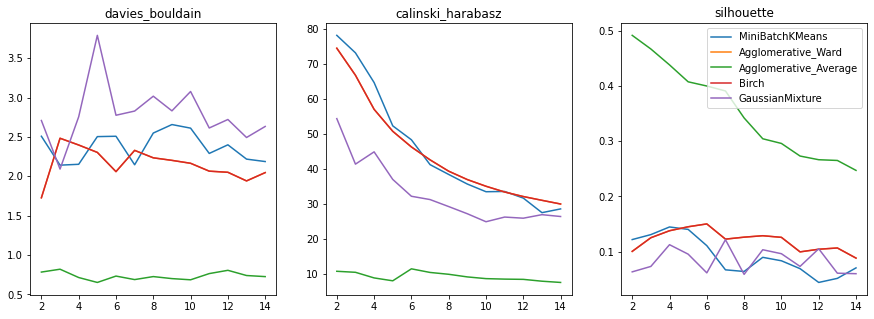

In [10]:
plot_cluster_metrics(silhouette_scores, davies_bouldin_scores, calinski_harabasz_scores)

For davies_bouldain and silhouette score Agglomerative Clustering with Average Linkage is significantly better than all other algorithms,
while for calinski_harabasz score it is surprisingly the worst algorithm. Moreover, most scores decrease with number of clusters, suggesting that data is not easily separated and there is no one natural number of clusters that maximize (or minimize, regarding davies bouldain score) aformentioned scores.

In [11]:
full_data = pd.read_csv("./AllBooks_baseline_DTM_Labelled.csv", index_col=0)

In [12]:
# Only 100 most popular words
data_top_100 = full_data.loc[:, full_data.sum(axis=0).sort_values(ascending=False)[:200].index]

In [13]:
silhouette_scores_top_100, davies_bouldin_scores_top_100, calinski_harabasz_scores_top_100 = calculate_cluster_metrics(2, 15, data_top_100)

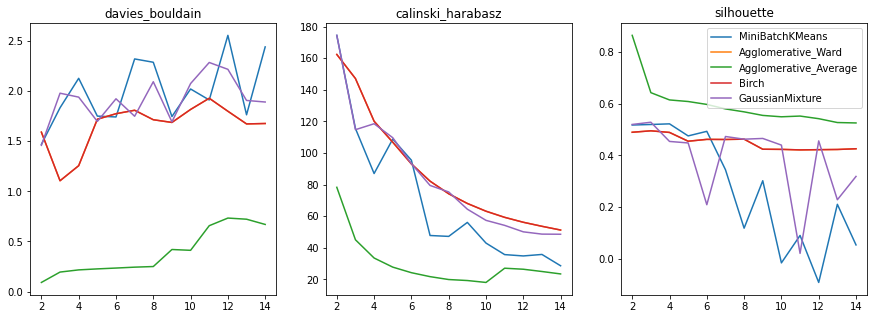

In [14]:
plot_cluster_metrics(silhouette_scores_top_100, davies_bouldin_scores_top_100, calinski_harabasz_scores_top_100)

For data consisting of 100 most popular words results are similar, with agglomerative clustering with average linkage still being the outlier.

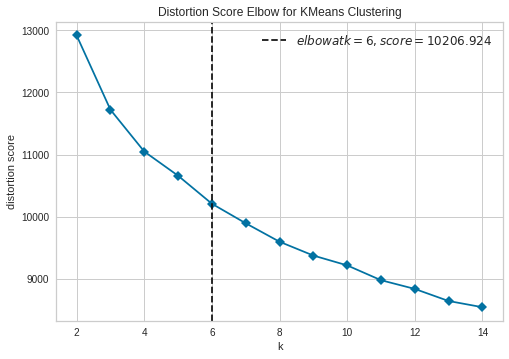

In [16]:
from yellowbrick.cluster import KElbowVisualizer

model =cluster.KMeans()
visualizer = KElbowVisualizer(model, k=(2,15),timings=False)

visualizer.fit(data)    
visualizer.show();

No significant point in elbow plot suggests once again that data is not easily separable.

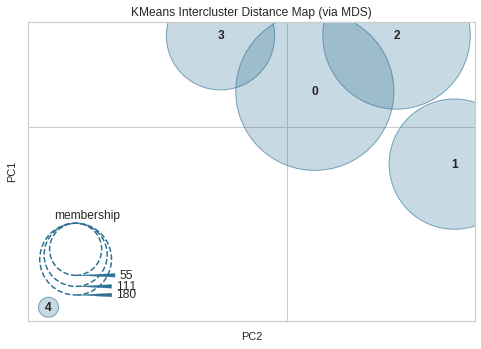

In [17]:
from yellowbrick.cluster import intercluster_distance
intercluster_distance(cluster.KMeans(5, random_state=42), data);

Projecting data into 2 dimensions shows that somehow clustering algorithm found way to separate at least one distinct cluster

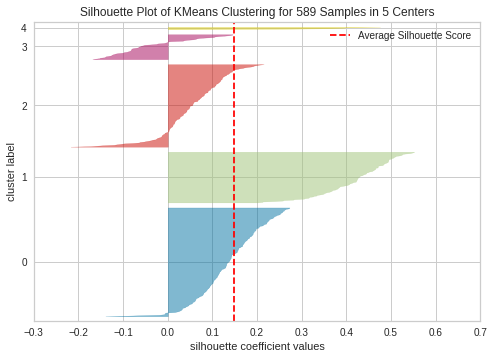

In [18]:
from yellowbrick.cluster import silhouette_visualizer
silhouette_visualizer(cluster.KMeans(5, random_state=42), data, colors='yellowbrick');

Analyzing silhouette diagrams results in a bit of a headache:
green cluster and very small yellow cluster are  very well separated.
Blue cluster is descent, while both red and purple have many observations that might have been asigned to the wrong clusterster.


TODO: 
- different clustering algorithms: DBSCAN, HDBSCAN, genie, meanshift, affinity propagation
- use other metrics based on truth labels: Adjusted Rand index, Fowlkes-Mallows index